# Tuning Model Performance

#### Description:

This codebook covers how to tune models to improve their performance.

#### Skill level:

- Intermediate

### Import the required libraries
-------------------------

In [1]:
import warnings
from sklearn.exceptions import DataConversionWarning
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Read data into a Pandas dataframe
-------------------------

In [2]:
df_raw = pd.read_csv('data/boston.txt', encoding='utf-8')

### Check the shape and head of the dataframe
-------------------------

In [3]:
df_raw.shape

(506, 14)

In [4]:
df_raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Separate features from the label
-------------------------

In [5]:
X_all = df_raw.drop('MDEV', axis=1)

In [6]:
y_true_all = df_raw[['MDEV']].values

### Make a split between training and test sets of data
-------------------------

In [7]:
def shuffle_split_data(y_true_all, X_all, test_size):
    X_train, X_test, y_true_train, y_true_test = train_test_split(X_all, y_true_all, test_size=test_size)

    return X_train, y_true_train, X_test, y_true_test

In [8]:
X_train, y_true_train, X_test, y_true_test = shuffle_split_data(y_true_all, X_all, test_size=0.3)

### Assess model performance over various training and test splits
-------------------------

In [9]:
def performance_metric(y_true, y_pred, metric):

    if metric == 'mean_squared_error':
        score = mean_squared_error(y_true, y_pred)
        
    elif metric == 'explained_variance_score':
        score = explained_variance_score(y_true, y_pred)
        
    elif metric == 'mean_absolute_error':
        score = mean_absolute_error(y_true, y_pred)
        
    elif metric == 'mean_squared_error':
        score = mean_squared_error(y_true, y_pred)

    elif metric == 'median_absolute_error':
        score = median_absolute_error(y_true, y_pred)

    else:
        score = r2_score(y_true, y_pred)

    return score


def eval_clf(clf, X, y_true, metric):
    y_pred = clf.predict(X)

    score = performance_metric(y_true, y_pred, metric)

    return score


def get_learning_curves(y_true_all, X_all, metric):
    np.random.seed(0)

    plt.clf()

    fig = plt.figure(figsize=(18, 6))

    training_sizes = np.round(np.linspace(0.1, 0.9, 5), 10)

    # DT -------------------------------

    df_results = pd.DataFrame(columns=['s', 'score', 'set'])

    for s in training_sizes:
        for i in range(0, 5):
            X_train, y_true_train, X_test, y_true_test = shuffle_split_data(y_true_all, X_all, 1 - s)

            clf = DecisionTreeRegressor()
            clf = clf.fit(X_train, y_true_train)

            train_s = eval_clf(clf, X_train, y_true_train, metric)
            test_s = eval_clf(clf, X_test, y_true_test, metric)

            df_results.loc[len(df_results.index)] = [s, test_s, 'test']
            df_results.loc[len(df_results.index)] = [s, train_s, 'train']

    ax = fig.add_subplot(1, 3, 1)

    ax = sns.pointplot(x='s', y='score', hue='set', data=df_results)

    ax.legend()
    ax.set_title('Decision Tree')
    ax.set_xlabel('training set size (%)')
    ax.set_ylabel(metric)
    

    # DT w Boost -------------------------------

    df_results = pd.DataFrame(columns=['s', 'score', 'set'])

    for s in training_sizes:
        for i in range(0, 5):
            X_train, y_true_train, X_test, y_true_test = shuffle_split_data(y_true_all, X_all, 1 - s)

            clf = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())
            clf = clf.fit(X_train, y_true_train)

            train_s = eval_clf(clf, X_train, y_true_train, metric)
            test_s = eval_clf(clf, X_test, y_true_test, metric)

            df_results.loc[len(df_results.index)] = [s, test_s, 'test']
            df_results.loc[len(df_results.index)] = [s, train_s, 'train']

    ax = fig.add_subplot(1, 3, 2)

    ax = sns.pointplot(x='s', y='score', hue='set', data=df_results)

    ax.legend()
    ax.set_title('Decision Tree with Boosting')
    ax.set_xlabel('training set size (%)')
    ax.set_ylabel(metric)
    

    # SVR -------------------------------

    df_results = pd.DataFrame(columns=['s', 'score', 'set'])

    for s in training_sizes:
        for i in range(0, 5):
            X_train, y_true_train, X_test, y_true_test = shuffle_split_data(y_true_all, X_all, 1 - s)

            clf = SVR()
            clf = clf.fit(X_train, y_true_train)

            train_s = eval_clf(clf, X_train, y_true_train, metric)
            test_s = eval_clf(clf, X_test, y_true_test, metric)

            df_results.loc[len(df_results.index)] = [s, test_s, 'test']
            df_results.loc[len(df_results.index)] = [s, train_s, 'train']

    ax = fig.add_subplot(1, 3, 3)

    ax = sns.pointplot(x='s', y='score', hue='set', data=df_results)

    ax.legend()
    ax.set_title('Support Vector Machine')
    ax.set_xlabel('training set size (%)')
    ax.set_ylabel(metric)

    return fig

<Figure size 432x288 with 0 Axes>

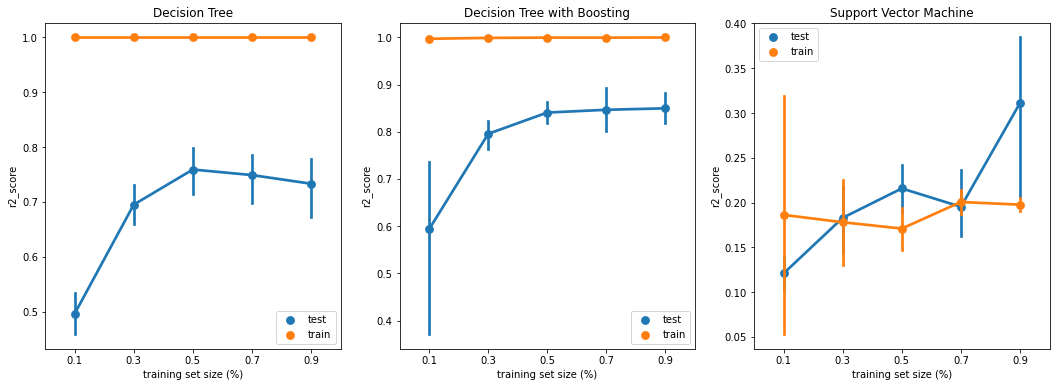

In [10]:
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

fig = get_learning_curves(y_true_all, X_all, 'r2_score')

### Assess model performance by varying model complexity parameters
-------------------------

In [11]:
def get_complexity_curves(y_true_all, X_all, test_size, metric):
    np.random.seed(0)

    plt.clf()

    fig = plt.figure(figsize=(18, 6))

    X_train, y_true_train, X_test, y_true_test = shuffle_split_data(y_true_all, X_all, test_size)

    # DT -------------------------------

    df_results = pd.DataFrame(columns=['s', 'score', 'set'])

    max_depth = np.linspace(1, 20, 10, dtype=int)

    for p in max_depth:
        
        for i in range(0, 5):
            clf = DecisionTreeRegressor(max_depth=p)
            clf = clf.fit(X_train, y_true_train)

            train_s = eval_clf(clf, X_train, y_true_train, metric)
            test_s = eval_clf(clf, X_test, y_true_test, metric)

            df_results.loc[len(df_results.index)] = [p, test_s, 'test']
            df_results.loc[len(df_results.index)] = [p, train_s, 'train']

    ax = fig.add_subplot(1, 3, 1)

    ax = sns.pointplot(x='s', y='score', hue='set', data=df_results)

    ax.legend()
    ax.set_title('Decision Tree')
    ax.set_xlabel('max_depth')
    ax.set_ylabel(metric)
    

    # DT w Boost -------------------------------

    df_results = pd.DataFrame(columns=['s', 'score', 'set'])
    
    n_estimators = np.linspace(10, 100, 10, dtype=int)

    for p in n_estimators:
        
        for i in range(0, 5):
            clf = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=p)
            clf = clf.fit(X_train, y_true_train)

            train_s = eval_clf(clf, X_train, y_true_train, metric)
            test_s = eval_clf(clf, X_test, y_true_test, metric)

            df_results.loc[len(df_results.index)] = [p, test_s, 'test']
            df_results.loc[len(df_results.index)] = [p, train_s, 'train']

    ax = fig.add_subplot(1, 3, 2)

    ax = sns.pointplot(x='s', y='score', hue='set', data=df_results)

    ax.legend()
    ax.set_title('Decision Tree with Boosting')
    ax.set_xlabel('n_estimators')
    ax.set_ylabel(metric)
    

    # SVR -------------------------------

    df_results = pd.DataFrame(columns=['s', 'score', 'set'])

    gamma = np.round(np.linspace(0.00001, 0.001, 10), 10)

    for p in gamma:

        for i in range(0, 5):
            clf = SVR(gamma=p)
            clf = clf.fit(X_train, y_true_train)

            train_s = eval_clf(clf, X_train, y_true_train, metric)
            test_s = eval_clf(clf, X_test, y_true_test, metric)

            df_results.loc[len(df_results.index)] = [p, test_s, 'test']
            df_results.loc[len(df_results.index)] = [p, train_s, 'train']

    ax = fig.add_subplot(1, 3, 3)

    ax = sns.pointplot(x='s', y='score', hue='set', data=df_results)

    ax.legend()
    ax.set_title('Support Vector Machine')
    ax.set_xlabel('gamma')
    ax.set_ylabel(metric)
    
    return fig

<Figure size 432x288 with 0 Axes>

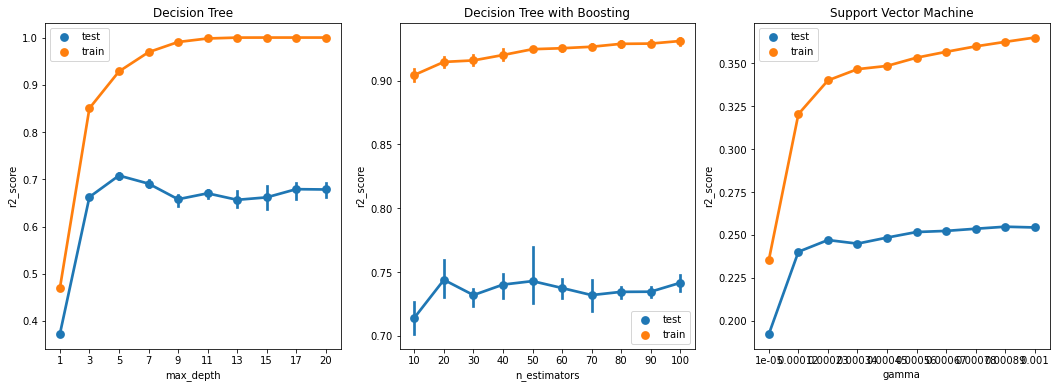

In [12]:
fig = get_complexity_curves(y_true_all, X_all, 0.3, 'r2_score')

### Use GridSearch Cross Validation to automatically tune a set of parameters
-------------------------

In [13]:
X_train, y_true_train, X_test, y_true_test = shuffle_split_data(y_true_all, X_all, 0.3)

In [14]:
parameters = [
    {
        'C': [1, 10, 100, 1000],
        'kernel': ['rbf'],
        'gamma': [0.5, 0.1, 0.001, 0.0001],
    }
]

clf = SVR()

grid_search = GridSearchCV(estimator=clf, param_grid=parameters, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_true_train)

### Get the score and parameter values for the best model
-------------------------

In [15]:
print(grid_search.best_estimator_)

SVR(C=1000, gamma=0.0001)


In [16]:
print(grid_search.best_score_)

-23.279562374831873


In [17]:
print(grid_search.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
